In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [32]:
df = pd.read_csv('census.csv')

In [33]:
test = df[df['capital-gain'] != 0]
test = test[test['capital-loss'] != 0]
test.shape

(0, 14)

In [34]:
gain = df[df['capital-gain'] != 0]
loss = df[df['capital-loss'] != 0]

In [35]:
gain['Log-gain'] = np.log(gain['capital-gain'])

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_79461/1554274209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain['Log-gain'] = np.log(gain['capital-gain'])


In [36]:
loss['Log-loss'] = np.log(loss['capital-loss'])

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_79461/2123541653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss['Log-loss'] = np.log(loss['capital-loss'])


<AxesSubplot:>

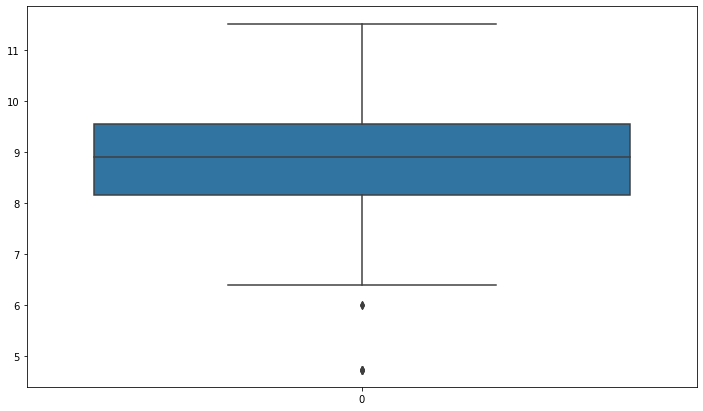

In [37]:
plt.figure(figsize = (12, 7))
sns.boxplot(gain['Log-gain'])

In [38]:
gain.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Log-gain
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,7.684324
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K,9.552795
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K,8.552174
55,30,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013.0,0.0,40.0,United-States,<=50K,8.519790
56,30,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,2407.0,0.0,40.0,United-States,<=50K,7.786136


In [39]:
gain['workclass'] = LabelEncoder().fit_transform(gain['workclass'])
gain['education_level'] = LabelEncoder().fit_transform(gain['education_level'])
gain['marital-status'] = LabelEncoder().fit_transform(gain['marital-status'])
gain['occupation'] = LabelEncoder().fit_transform(gain['occupation'])
gain['race'] = LabelEncoder().fit_transform(gain['race'])
gain['sex'] = LabelEncoder().fit_transform(gain['sex'])
gain['native-country'] = LabelEncoder().fit_transform(gain['native-country'])
gain['income'] = LabelEncoder().fit_transform(gain['income'])
gain['relationship'] = LabelEncoder().fit_transform(gain['relationship'])

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_79461/94404691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain['workclass'] = LabelEncoder().fit_transform(gain['workclass'])
/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_79461/94404691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain['education_level'] = LabelEncoder().fit_transform(gain['education_level'])
/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_79461/94404691.py:3: SettingWithCopyWarning: 
A value

In [40]:
gain.loc[:, 'capital-gain'] = gain['Log-gain']
gain.head()

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_79461/1923753071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain.loc[:, 'capital-gain'] = gain['Log-gain']


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Log-gain
0,39,5,9,13.0,4,0,1,4,1,7.684324,0.0,40.0,35,0,7.684324
8,31,2,12,14.0,4,9,1,4,0,9.552795,0.0,50.0,35,1,9.552795
9,42,2,9,13.0,2,3,0,4,1,8.552174,0.0,40.0,35,1,8.552174
55,30,2,11,9.0,2,6,0,4,1,8.519790,0.0,40.0,35,0,8.519790
56,30,2,9,13.0,2,11,0,4,1,7.786136,0.0,40.0,35,0,7.786136


In [41]:
gain.drop(columns = ['Log-gain'], inplace = True)
gain.head()

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_79461/255237928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain.drop(columns = ['Log-gain'], inplace = True)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13.0,4,0,1,4,1,7.684324,0.0,40.0,35,0
8,31,2,12,14.0,4,9,1,4,0,9.552795,0.0,50.0,35,1
9,42,2,9,13.0,2,3,0,4,1,8.552174,0.0,40.0,35,1
55,30,2,11,9.0,2,6,0,4,1,8.519790,0.0,40.0,35,0
56,30,2,9,13.0,2,11,0,4,1,7.786136,0.0,40.0,35,0


In [42]:
gain.shape

(3790, 14)

In [43]:
from sklearn.model_selection import train_test_split
Y = gain['income']
X = gain.drop('income', axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size = 0.8, random_state = 0)

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (3032, 13)
The shape of X_test is: (758, 13)

The shape of y_train is: (3032,)
The shape of y_test is: (758,)


In [45]:
from sklearn import *

In [54]:
from sklearn.naive_bayes import GaussianNB
model_GaussianNB = GaussianNB()

model_GaussianNB.fit(X_train, y_train)

y_prediction = model_GaussianNB.predict(X_test) 

print('Logistic Regression accuracy = ', metrics.accuracy_score(y_prediction,y_test))

Logistic Regression accuracy =  0.8350923482849604


In [57]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pre_tree = model_tree.predict(X_test)

print(metrics.accuracy_score(y_pre_tree, y_test))

0.9775725593667546
